### Installing necessary modules


In [1]:
 !pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

### Loading the Data

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-22 01:59:56--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [               <=>  ]  22.62M  4.37MB/s    in 10s     

2025-02-22 02:00:07 (2.19 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
import time
stime = time.time()

In [6]:
df1 = pd.read_excel('Online Retail.xlsx' , dtype={'InvoiceNo' : 'string' , 'StockCode' : 'string' , 'Description': 'string' , 'Country' : 'string'})
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df1.shape

(541909, 8)

In [8]:
df1 = pd.concat([df1]* 60)
df1.shape

(32514540, 8)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32514540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    string        
 1   StockCode    string        
 2   Description  string        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 2.2 GB


### Data Cleaning : Handle Missing values

In [10]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,87240
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8104800
Country,0


In [11]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [12]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [14]:
most_freq = df1[['StockCode' , 'Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4787,35833P,check,60
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,60
4789,21412,VINTAGE GOLD TINSEL REEL,60
4790,21414,SCALLOP SHELL SOAP DISH,60


In [15]:
most_freq[most_freq.StockCode=='85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120


In [16]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,60
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,60
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,60
4789,21412,VINTAGE GOLD TINSEL REEL,60


In [17]:
most_freq.columns = ["StockCode" , "freq_Description" , "count"]
df2 = df1.merge(most_freq , on='StockCode' , how='left')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940.0


In [18]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940.0


In [19]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,6720
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8104800
Country,0
freq_Description,6720
count,6720


In [20]:
df2.dropna(subset=['Description'] , inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8098080
Country,0
freq_Description,0
count,0


In [21]:
df2.drop(columns=['freq_Description' , 'count'] , inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning : Handling Invalid Values

In [22]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,3.250782e+07,32507820,3.250782e+07,2.440974e+07
mean,9.555919e+00,2011-07-04 14:06:48.671256832,4.612067e+00,1.528769e+04
min,-8.099500e+04,2010-12-01 08:26:00,-1.106206e+04,1.234600e+04
25%,1.000000e+00,2011-03-28 11:36:00,1.250000e+00,1.395300e+04
50%,3.000000e+00,2011-07-20 08:59:00,2.080000e+00,1.515200e+04
75%,1.000000e+01,2011-10-19 11:41:00,4.130000e+00,1.679100e+04
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,1.828700e+04
std,2.181032e+02,NaN,9.676974e+01,1.713598e+03


In [23]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
32513080,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
32514172,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
32514346,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
32514347,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Let's fix the Quantity and UnitPrice negative values

In [24]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
841892,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
841893,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
1383801,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
31188797,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
31730705,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
31730706,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
32272614,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [25]:
df3 = df2[(df2.Quantity > 0) & (df2.UnitPrice > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,3.180624e+07,31806240,3.180624e+07,2.387304e+07
mean,1.054204e+01,2011-07-04 20:16:05.225086720,3.907625e+00,1.529442e+04
min,1.000000e+00,2010-12-01 08:26:00,1.000000e-03,1.234600e+04
25%,1.000000e+00,2011-03-28 12:22:00,1.250000e+00,1.396900e+04
50%,3.000000e+00,2011-07-20 12:58:00,2.080000e+00,1.515900e+04
75%,1.000000e+01,2011-10-19 12:39:00,4.130000e+00,1.679500e+04
max,8.099500e+04,2011-12-09 12:50:00,1.354133e+04,1.828700e+04
std,1.555240e+02,NaN,3.591565e+01,1.713139e+03


we can see there are outliers in both Quantity and UnitPrice. We can remove them by using QUANTILE

In [26]:
df3.Quantity.quantile(0.9999)

1440.0

we can see that the values are legit

In [27]:
df3[df3.Quantity > 1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
32410111,574294,21915,RED HARMONICA IN BOX,2100,2011-11-03 15:47:00,1.06,16333.0,United Kingdom
32419666,574941,22197,POPCORN HOLDER,1820,2011-11-07 17:42:00,1.95,NaN,United Kingdom
32463133,578060,M,Manual,1600,2011-11-22 15:22:00,0.25,17857.0,United Kingdom
32484052,579498,23084,RABBIT NIGHT LIGHT,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


## Feature Engineering : Creating New Columns

In [28]:
df4 = df3.copy()
df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [30]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
32514535,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
32514536,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
32514537,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
32514538,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31806240 entries, 0 to 32514539
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    string        
 1   StockCode    string        
 2   Description  string        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      string        
 8   TotalSales   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 2.4 GB


In [32]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12
8,536366,22632,HAND WARMER RED RETROSPOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12


## Visualization & EDA

#### 1. Plot Monthly sales

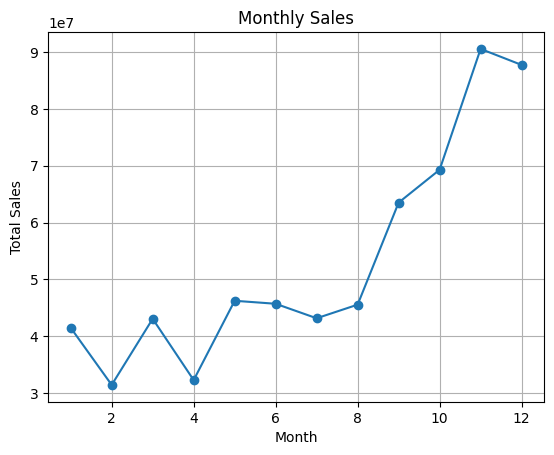

In [33]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales.plot(kind='line' , title='Monthly Sales', marker = "o")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

##### **Insights**
##### Total sales started rising up in August having a peak in November. This is likely due to the holiday season at the year end.

#### 2. Top 5 Countries

In [34]:
# prompt: plot horizantal bar chart for top 5 countries by total sales


top_5_countries = df4.groupby('Country')['TotalSales'].sum().nlargest(5)
top_5_countries

,TotalSales
Country,
United Kingdom,5.415133e+08
Netherlands,1.712678e+07
EIRE,1.700724e+07
Germany,1.373203e+07
France,1.258291e+07


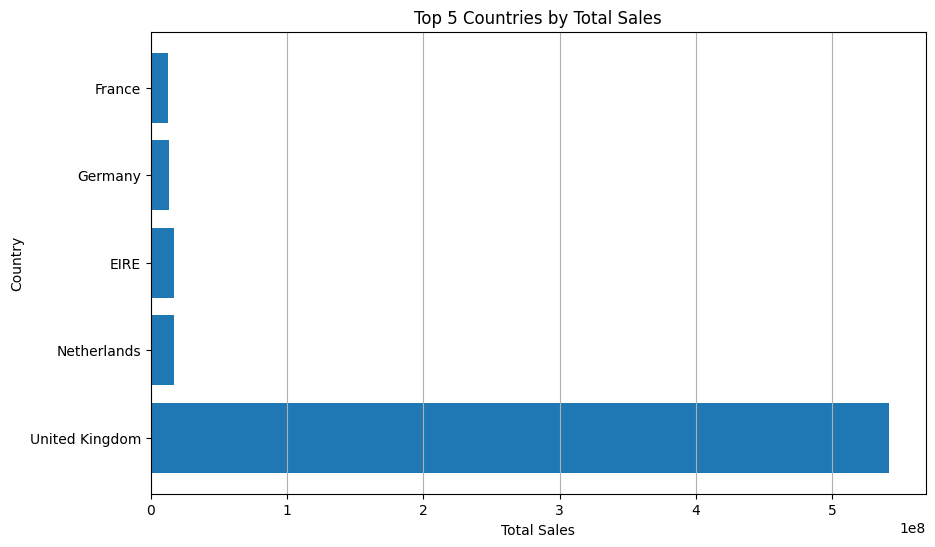

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()

##### Insights
#####   1.UK has the highest sales
#####   2.Netherlands,EIRE, Germany and France are the next 4 countries  
##### We must provide customers in these countries extra attention and ensure that our products and services are of the highest caliber, as they account for the majority of our sales revenues. Additionally, we can concentrate on growing sales in other nations to break the reliance on sales from a single one.

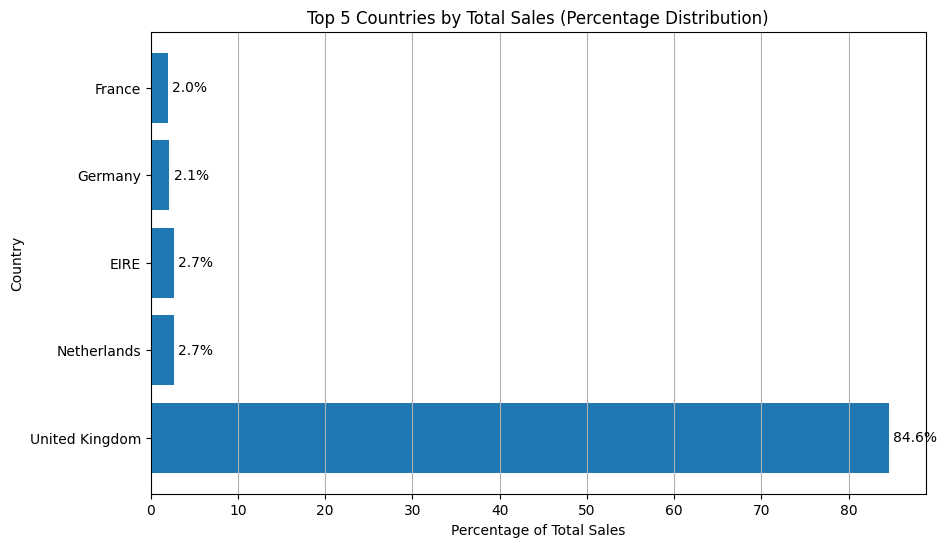

In [36]:
# prompt: plot same chart using percentage distribution. show % on the bar

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# ... (Your existing code)
country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.nlargest(5)
percentages = (top_5_countries / total_sales) * 100


plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales (Percentage Distribution)')
plt.grid(axis='x')

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentages):
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
           va='center', ha='left', fontsize=10)

plt.show()


#### 3. Top 5 products based on sales

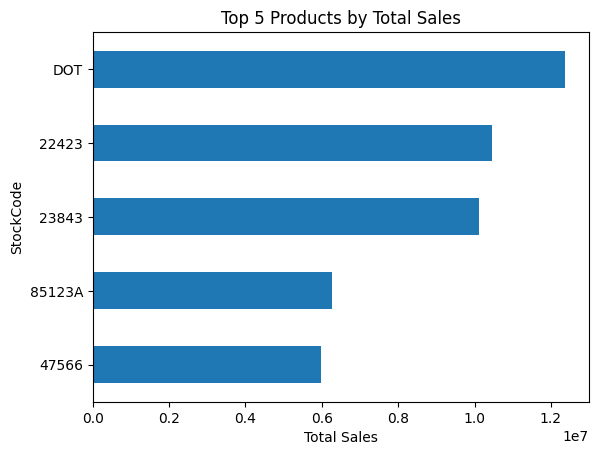

In [37]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()
product_wise_sales

top_5_products = product_wise_sales.nlargest(5)
top_5_products.plot(kind='barh' , title='Top 5 Products by Total Sales')
plt.ylabel('StockCode')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()

In [38]:
product_wise_sales.sort_values(ascending=False)

,TotalSales
StockCode,
DOT,12374926.20
22423,10469084.40
23843,10108176.00
85123A,6271128.00
47566,5970259.80
...,...
90084,51.00
21268,50.40
51014c,49.80


In [39]:
product_wise_sales.sum()

640001072.6400001

In [40]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
32509465,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
32509885,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
32511999,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
32513539,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [41]:
for stock_code in top_5_products.index:
  description = df4[df4.StockCode==stock_code].Description.iloc[0]
  print(f"StockCode: {stock_code} , Description: {description}")

StockCode: DOT , Description: DOTCOM POSTAGE
StockCode: 22423 , Description: REGENCY CAKESTAND 3 TIER
StockCode: 23843 , Description: PAPER CRAFT , LITTLE BIRDIE
StockCode: 85123A , Description: WHITE HANGING HEART T-LIGHT HOLDER
StockCode: 47566 , Description: PARTY BUNTING


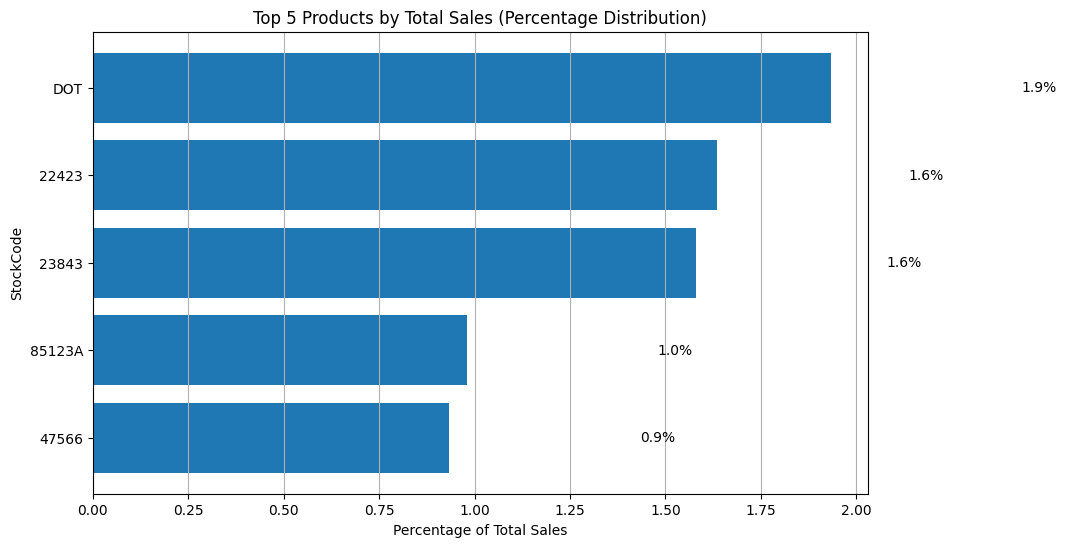

In [42]:
# prompt: plot the same chart for product sales but use percentage this time. show % on the bar

import matplotlib.pyplot as plt
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('StockCode')
plt.title('Top 5 Products by Total Sales (Percentage Distribution)')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentages):
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
           va='center', ha='left', fontsize=10)

plt.show()


#### 4. RFM Analysis

In [43]:
current_dt = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [45]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (current_dt - x.max()).days ,
    'InvoiceNo' : 'count' ,
    'TotalSales' : 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,60,4631016.0
12347.0,2,10920,258600.0
12348.0,75,1860,107834.4
12349.0,19,4380,105453.0
12350.0,310,1020,20064.0
12352.0,36,5100,150362.4
12353.0,204,240,5340.0
12354.0,232,3480,64764.0
12355.0,214,780,27564.0


In [46]:
df4[df4.CustomerID==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
603528,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
1145437,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
1687346,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
2229255,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
2771164,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
3313073,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
3854982,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
4396891,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1
4938800,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1


In [47]:
df4[df4.CustomerID== 12347]['TotalSales'].sum()

258600.0

In [48]:
# Segment Customers based on RFM
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=[4, 3, 2, 1])
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, labels=[4, 3, 2, 1])

rfm['R_Quartile'] = rfm['R_Quartile'].astype(int)
rfm['F_Quartile'] = rfm['F_Quartile'].astype(int)
rfm['M_Quartile'] = rfm['M_Quartile'].astype(int)

rfm['RFM_Score'] = rfm[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
12346.0,326,60,4631016.0,1,4,1,6
12347.0,2,10920,258600.0,4,1,1,6
12348.0,75,1860,107834.4,2,3,1,6
12349.0,19,4380,105453.0,3,2,1,6
12350.0,310,1020,20064.0,1,4,3,8
...,...,...,...,...,...,...,...
18280.0,278,600,10836.0,1,4,4,9
18281.0,181,420,4849.2,1,4,4,9
18282.0,8,720,10683.0,4,4,4,12


In [49]:
# Customers with highest RFM scores
rfm.sort_values(by='RFM_Score' , ascending=False)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
CustomerID,,,,,,,
14480.0,11,780,16743.0,4,4,4,12
16569.0,3,300,7452.0,4,4,4,12
13978.0,15,900,11807.4,4,4,4,12
16596.0,16,720,15009.0,4,4,4,12
15540.0,11,900,12798.0,4,4,4,12
...,...,...,...,...,...,...,...
15235.0,218,8580,134850.6,1,1,1,3
17337.0,151,32580,121672.2,1,1,1,3
17504.0,206,7620,179821.8,1,1,1,3


#### 5. Customer Churn Analysis

In [50]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [51]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [52]:
 current_dt

Timestamp('2011-12-10 12:50:00')

In [53]:
customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase = (current_dt - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [54]:
# Define churn threshold
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


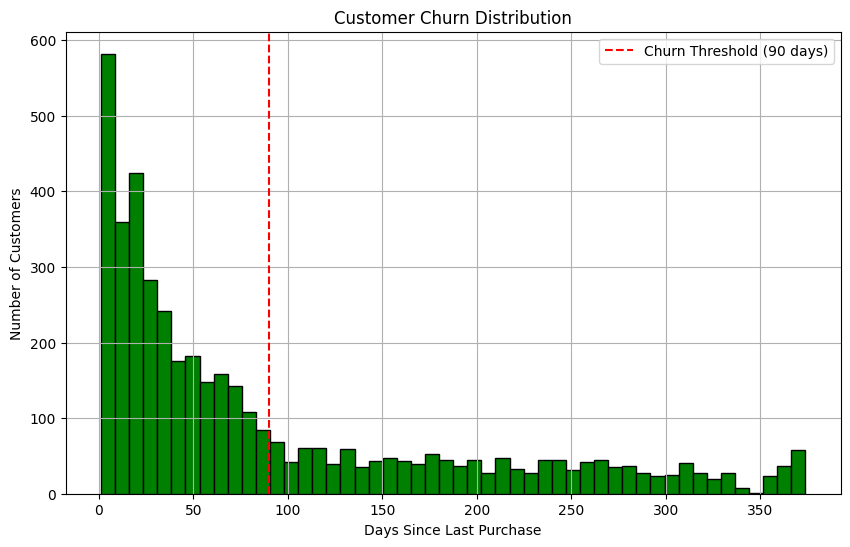

In [55]:
# prompt: plot histogram for customer churn distribution

import matplotlib.pyplot as plt

# Assuming 'churned_customers' Series is already created as in your provided code.

# Create a histogram of customer churn distribution
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='green', edgecolor='black')
plt.axvline(x=churn_threshold, color='red', linestyle='--', label=f'Churn Threshold ({churn_threshold} days)')
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
print(f"Total time taken : {time.time()-stime} sec")

Total time taken : 482.46474981307983 sec
